In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ING Network

In this notebook we model two interconnected inhibitory networks. Gamma rhythm is created by ING mechanism.

We explore the effect on noise strength and try to replicate Meng & Rieckes result.

Based on our findings for the ING model, we move forward to the PING model.

In [26]:
params = {
  "runtime": 1000.0,
  "ou_enabled": [False, False],
    
  "poisson_enabled": [True, True],
  "poisson_variance": 2.0,
  "poisson_p": 0.7,
  "poisson_size": 800,
  "poisson_mean_input": 250,
    
  "N_pop": 2,
  "net_record_spikes": 200
}

## Example Model

In [30]:
params_mid = dict(params)
params_mid.update({
    
    # Only Synaptic Strengths for I<->I.
    "J_ppee": 0.0,
    "J_ppei": 0.0,
    "J_ppii": 1.0,
    "J_itoi": 1.0,
    "J_etoe": 0.0,
    "J_etoi": 0.0,
    "J_itoe": 0.0,
    
    # Only connectivity for I to I, all-to-all.
    "p_ppee": 0.00,
    "p_ppei": 0.00,
    "p_etoi": 0.0,
    "p_etoe": 0,
    "p_itoe": 0.0,
    "p_itoi": 1.0,
    
    # Poisson Parameters
    "poisson_variance": 5.0,
    "poisson_mean_input": 500,
    "poisson_I_enabled": True,
    "poisson_I_ratio": 1.0,
    
    "syn_net_inh": True,
    "syn_net_exc": False,
    
    # Time Constants
    "tau_GABA": 9.0,
    
    #
    "N_e": 1,
    "N_i": 500,
    "II": True
})

In [31]:
model = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.37560009956359863s
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 7s
runtime: 13.0


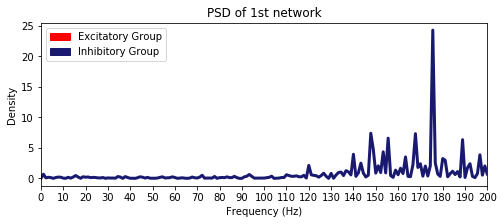

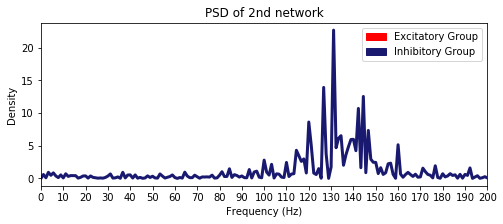

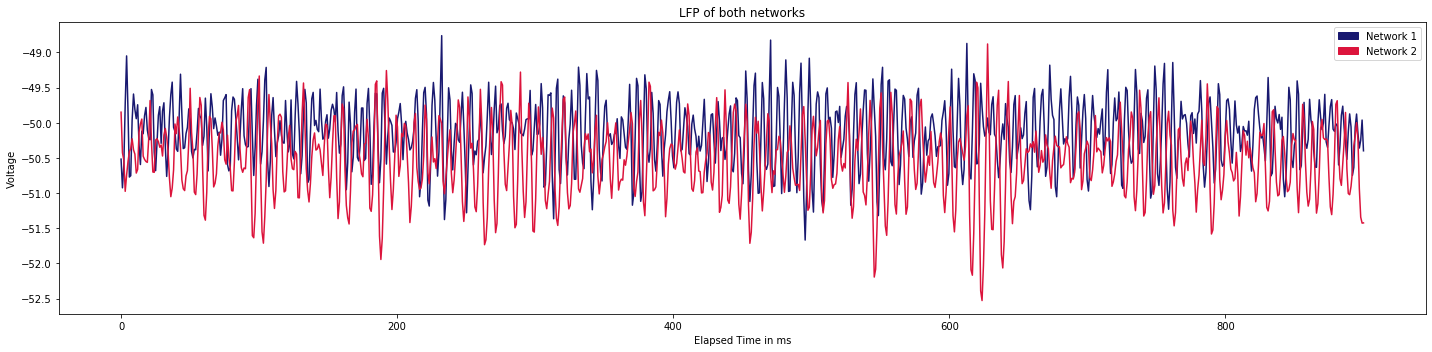

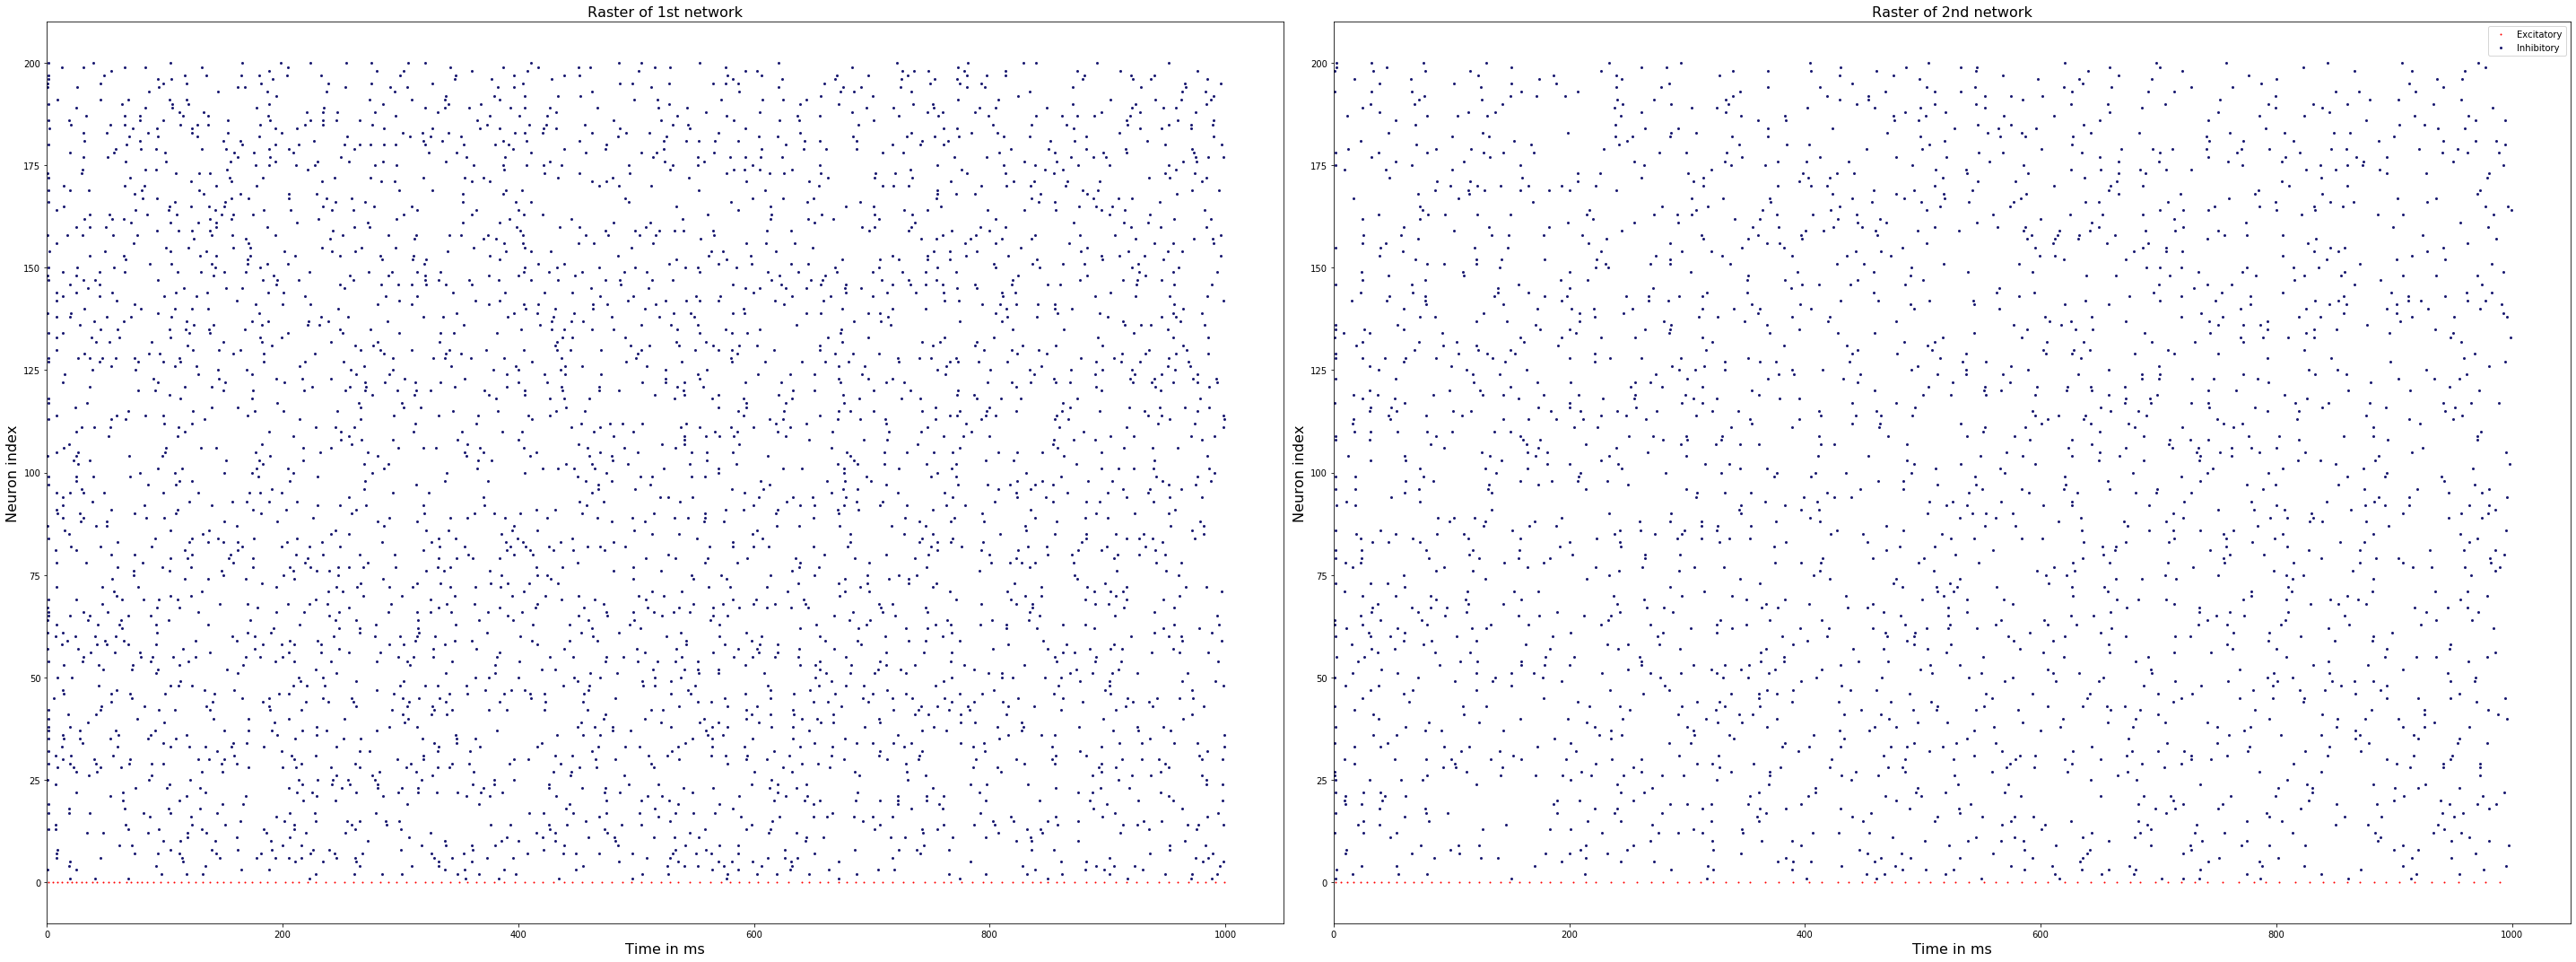

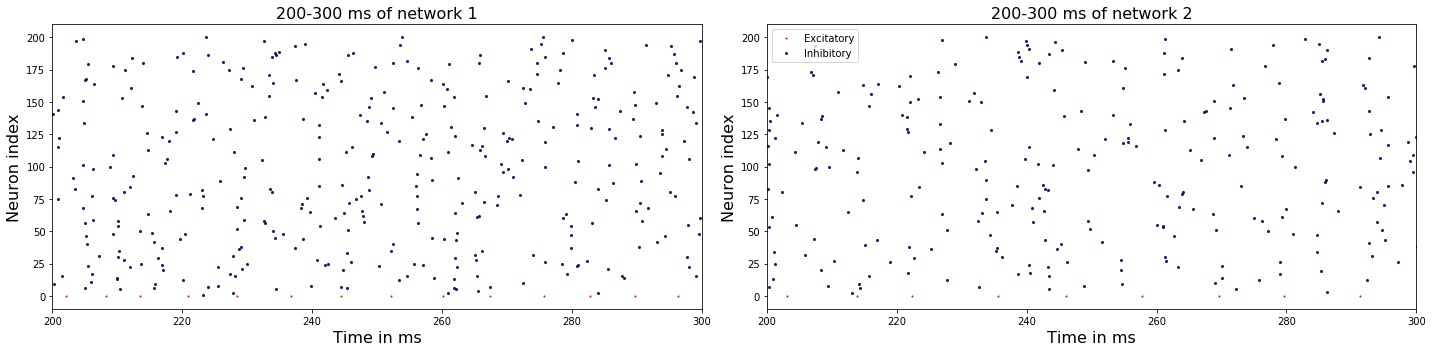

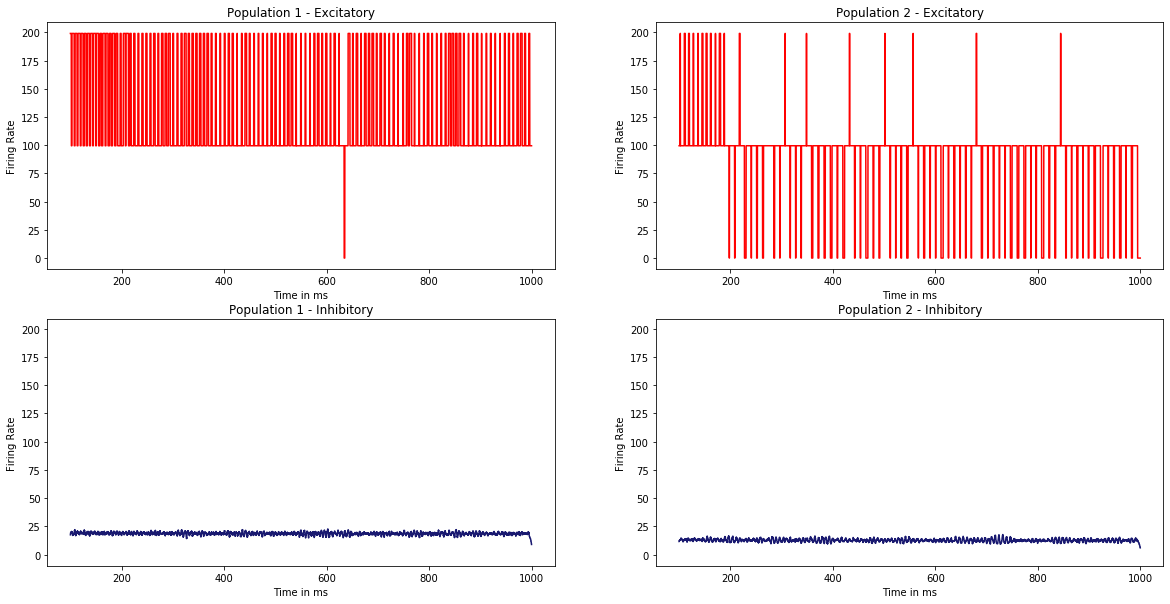

In [32]:
plots.plot_results(model, pop_rates=True, full_raster=True, xlim_psd=200)

# Exploration

In [7]:
models = []
values = [0.1, 1, 2, 5, 10, 20]

for x in values:
    params_mid["J_itoi"] = x
    m = runner.run(
        modified_params=params_mid
    )
    models.append(m)

Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.6223320960998535s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


runtime: 17.8
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5154402256011963s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
runtime: 10.3
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5864319801330566s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
runtime: 10.4
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5321500301361084s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 3s
runtime: 9.9
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Ne

----- J_itoi: 0.1 ----- 
----- J_itoi: 1 ----- 
----- J_itoi: 2 ----- 


WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:629: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20, 5))
 [py.warnings]
  fig = plt.figure(figsize=(20, 5))

WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:283: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(40, 15))
 [py.warnings]
  fig, axs = plt.subplots(1, 2, figsize=(40, 15))



----- J_itoi: 5 ----- 


WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))
 [py.warnings]
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))

WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:655: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey="col")
 [py.warnings]
  fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey="col")

WARN

----- J_itoi: 10 ----- 
----- J_itoi: 20 ----- 


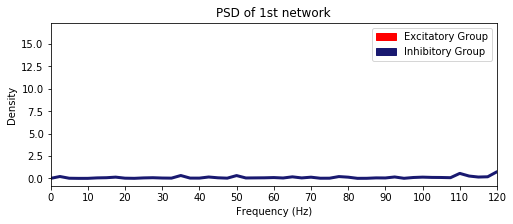

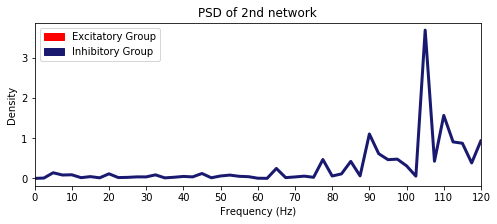

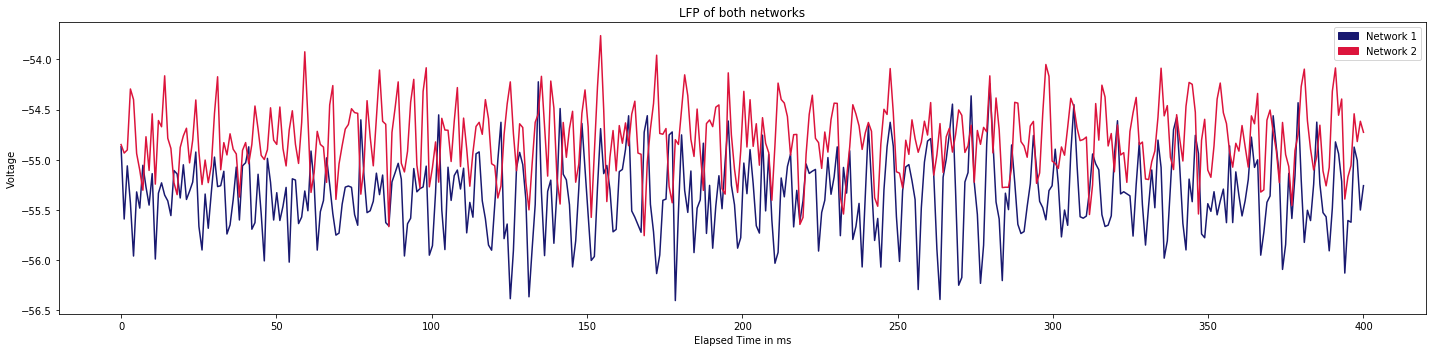

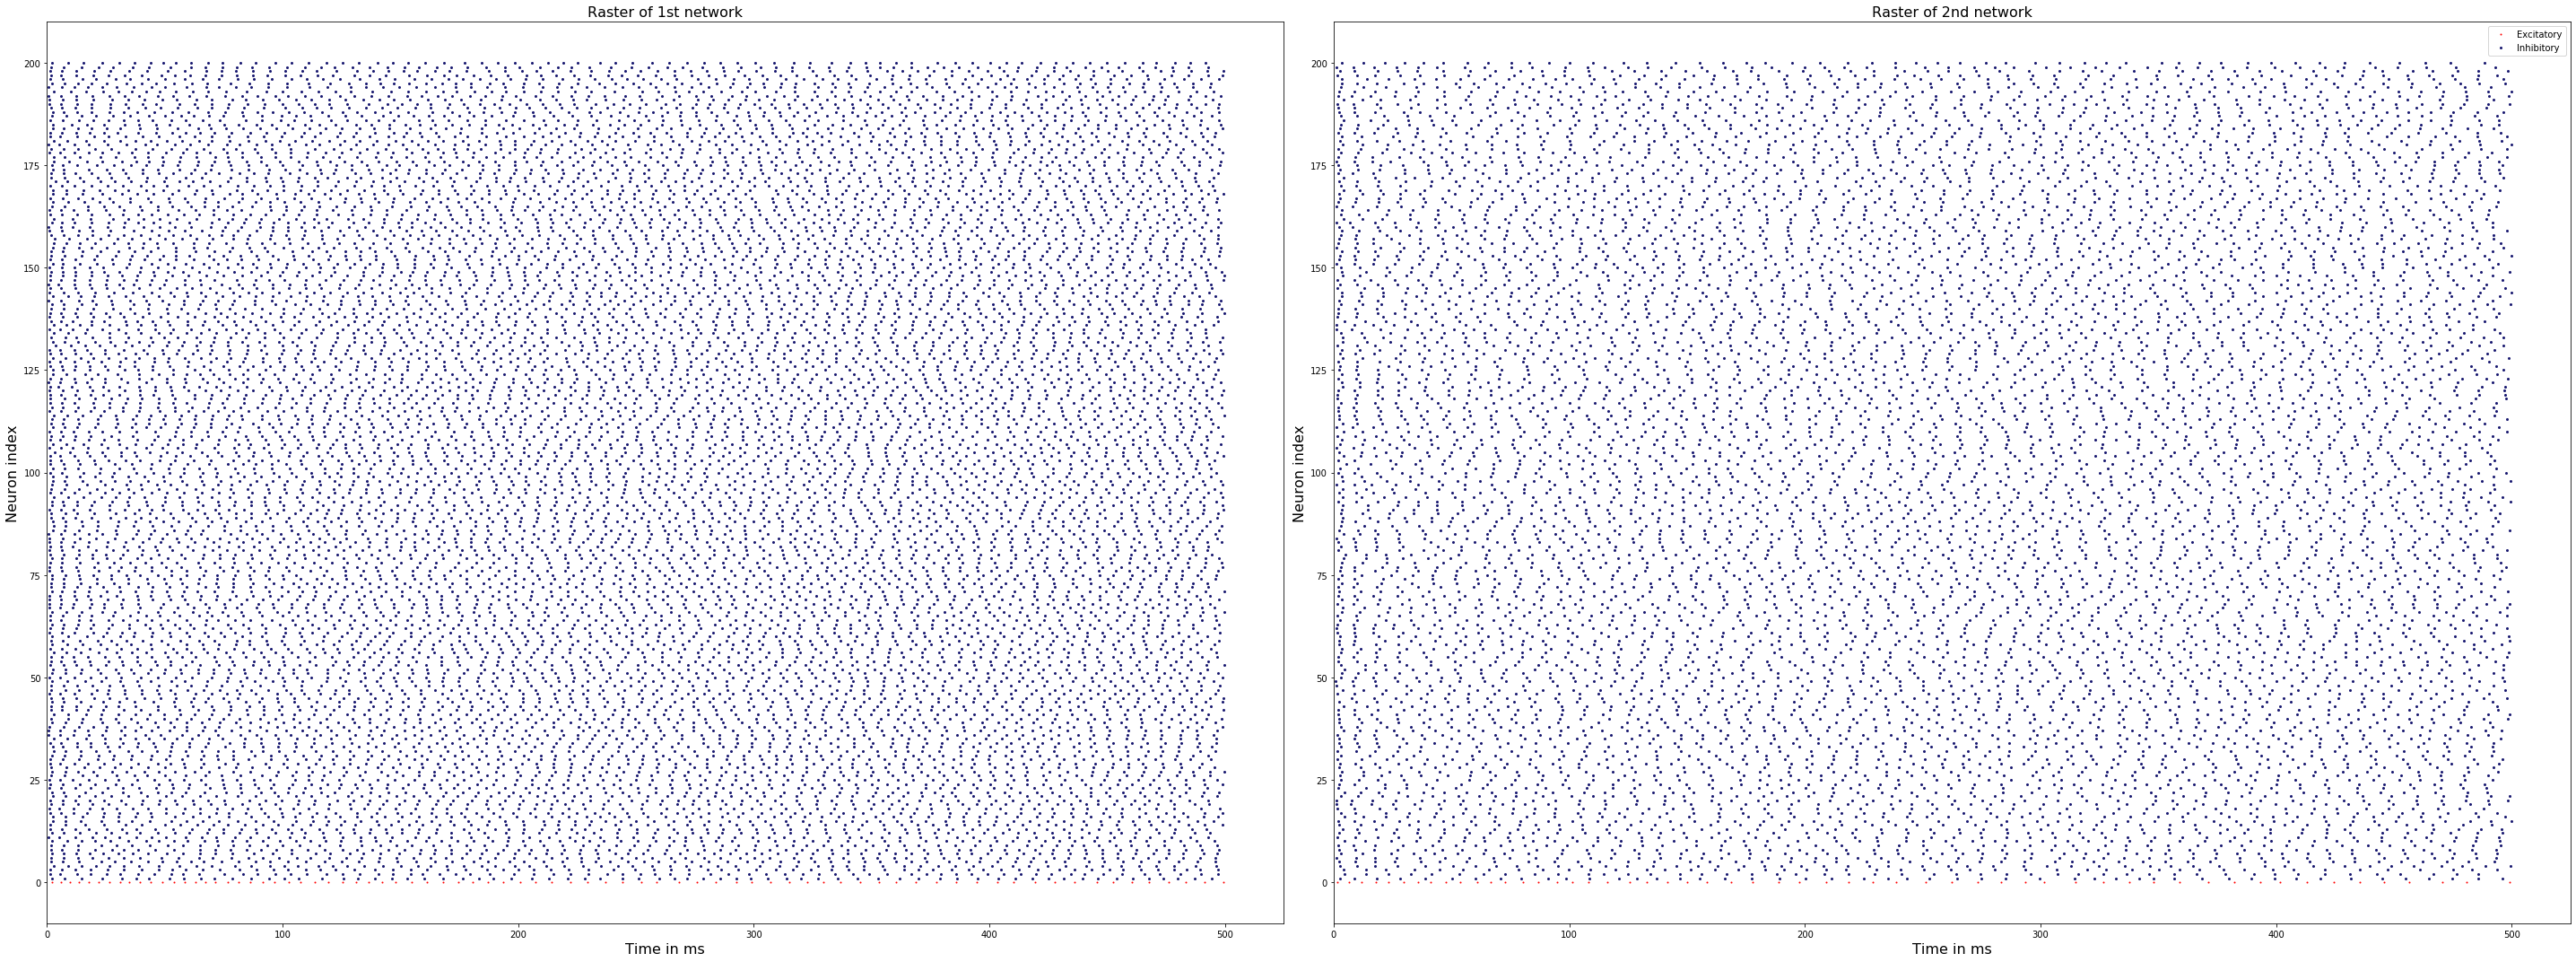

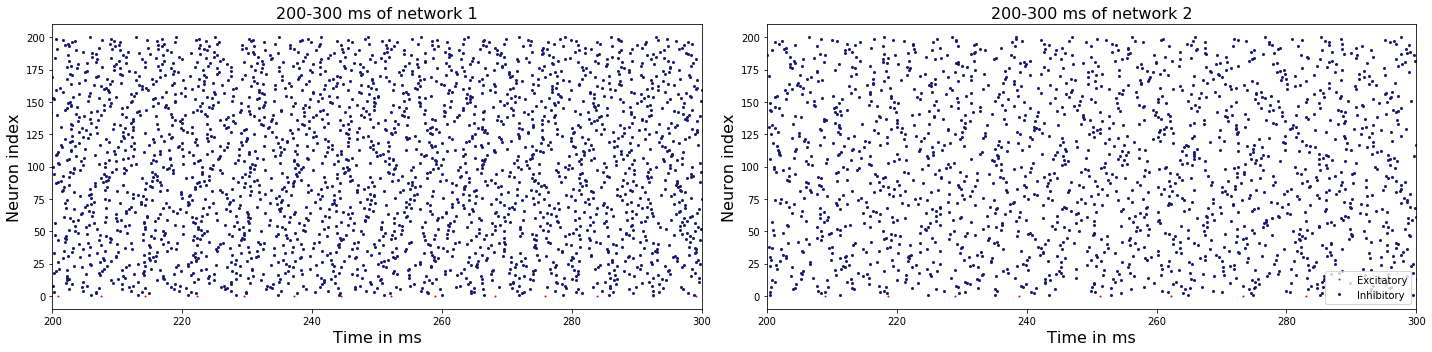

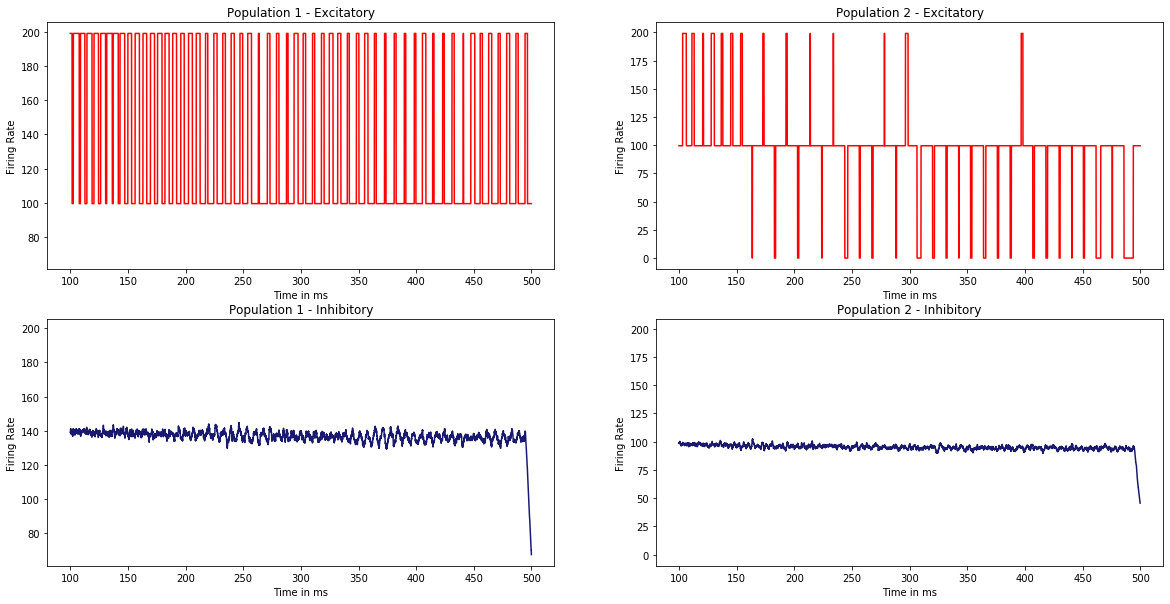

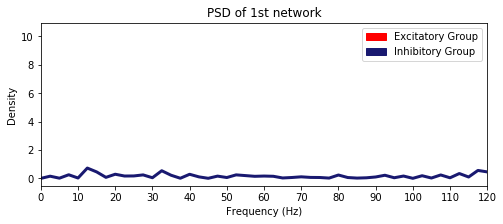

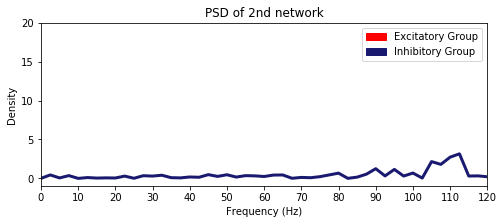

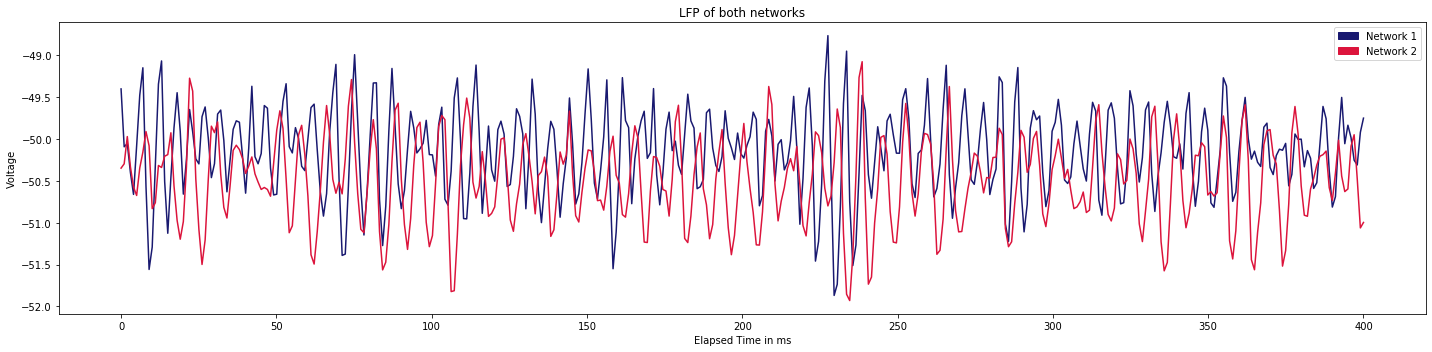

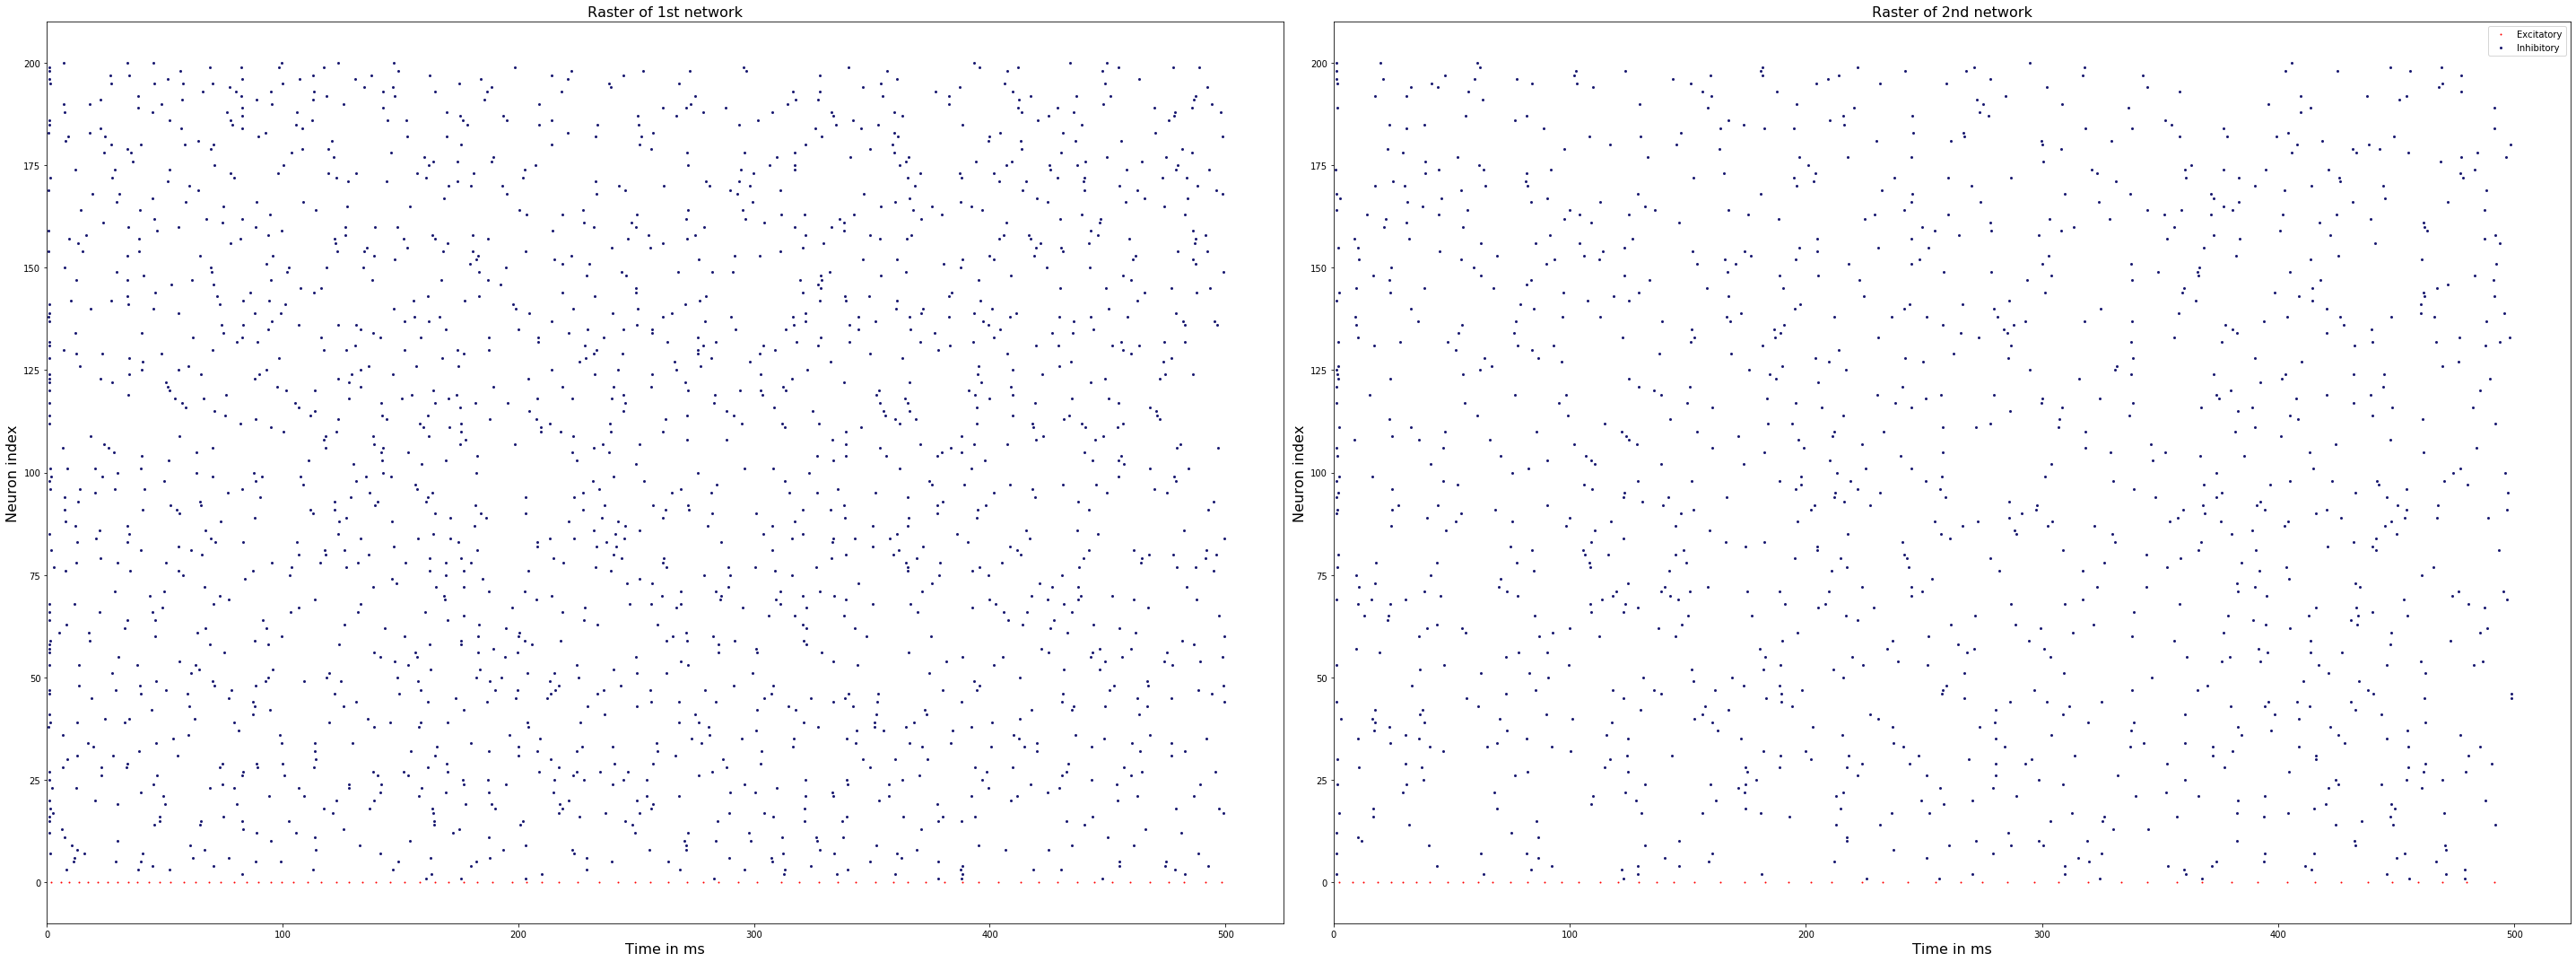

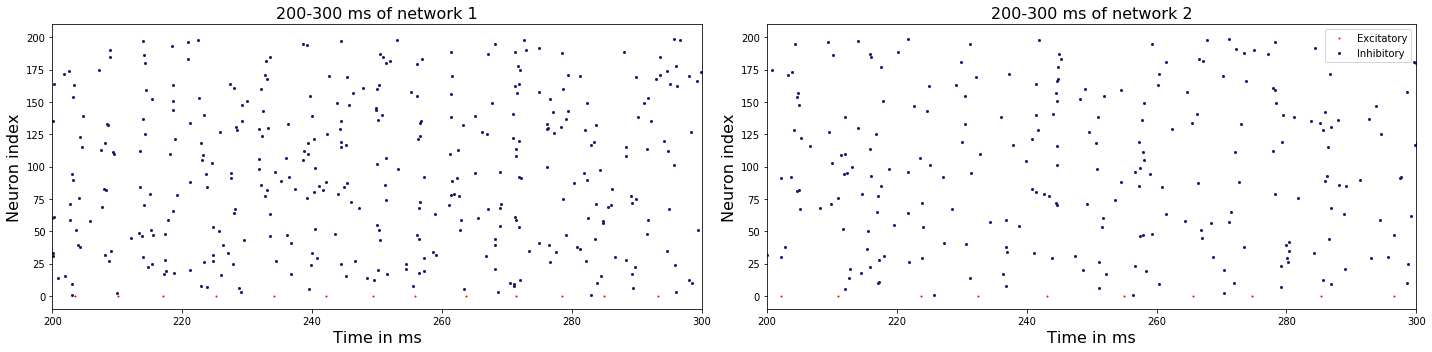

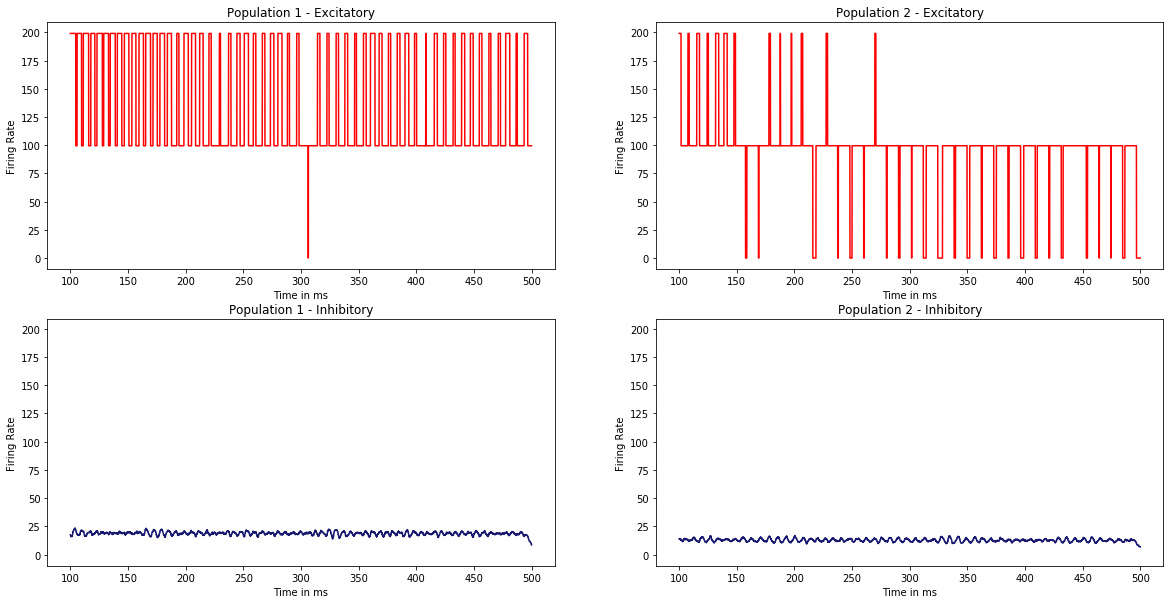

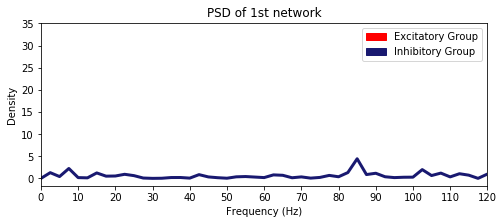

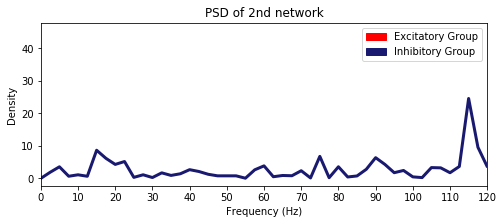

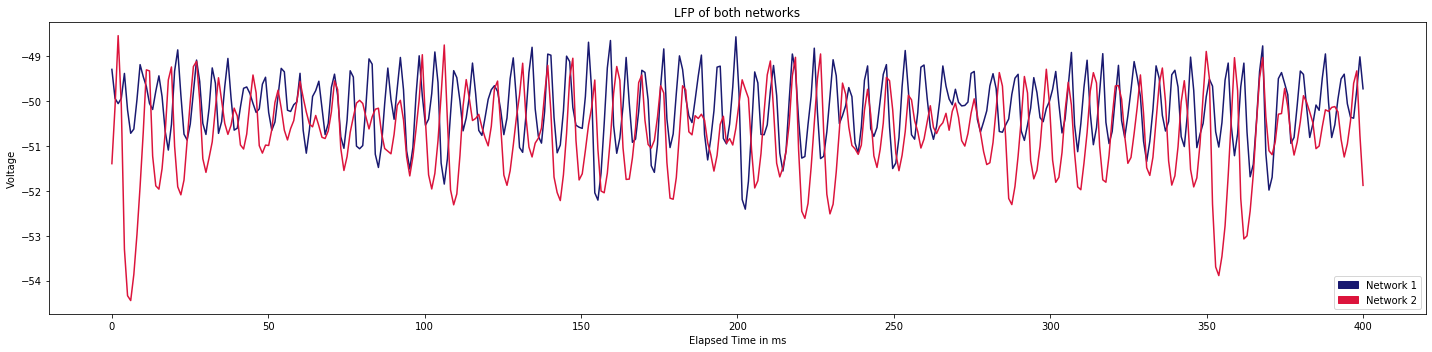

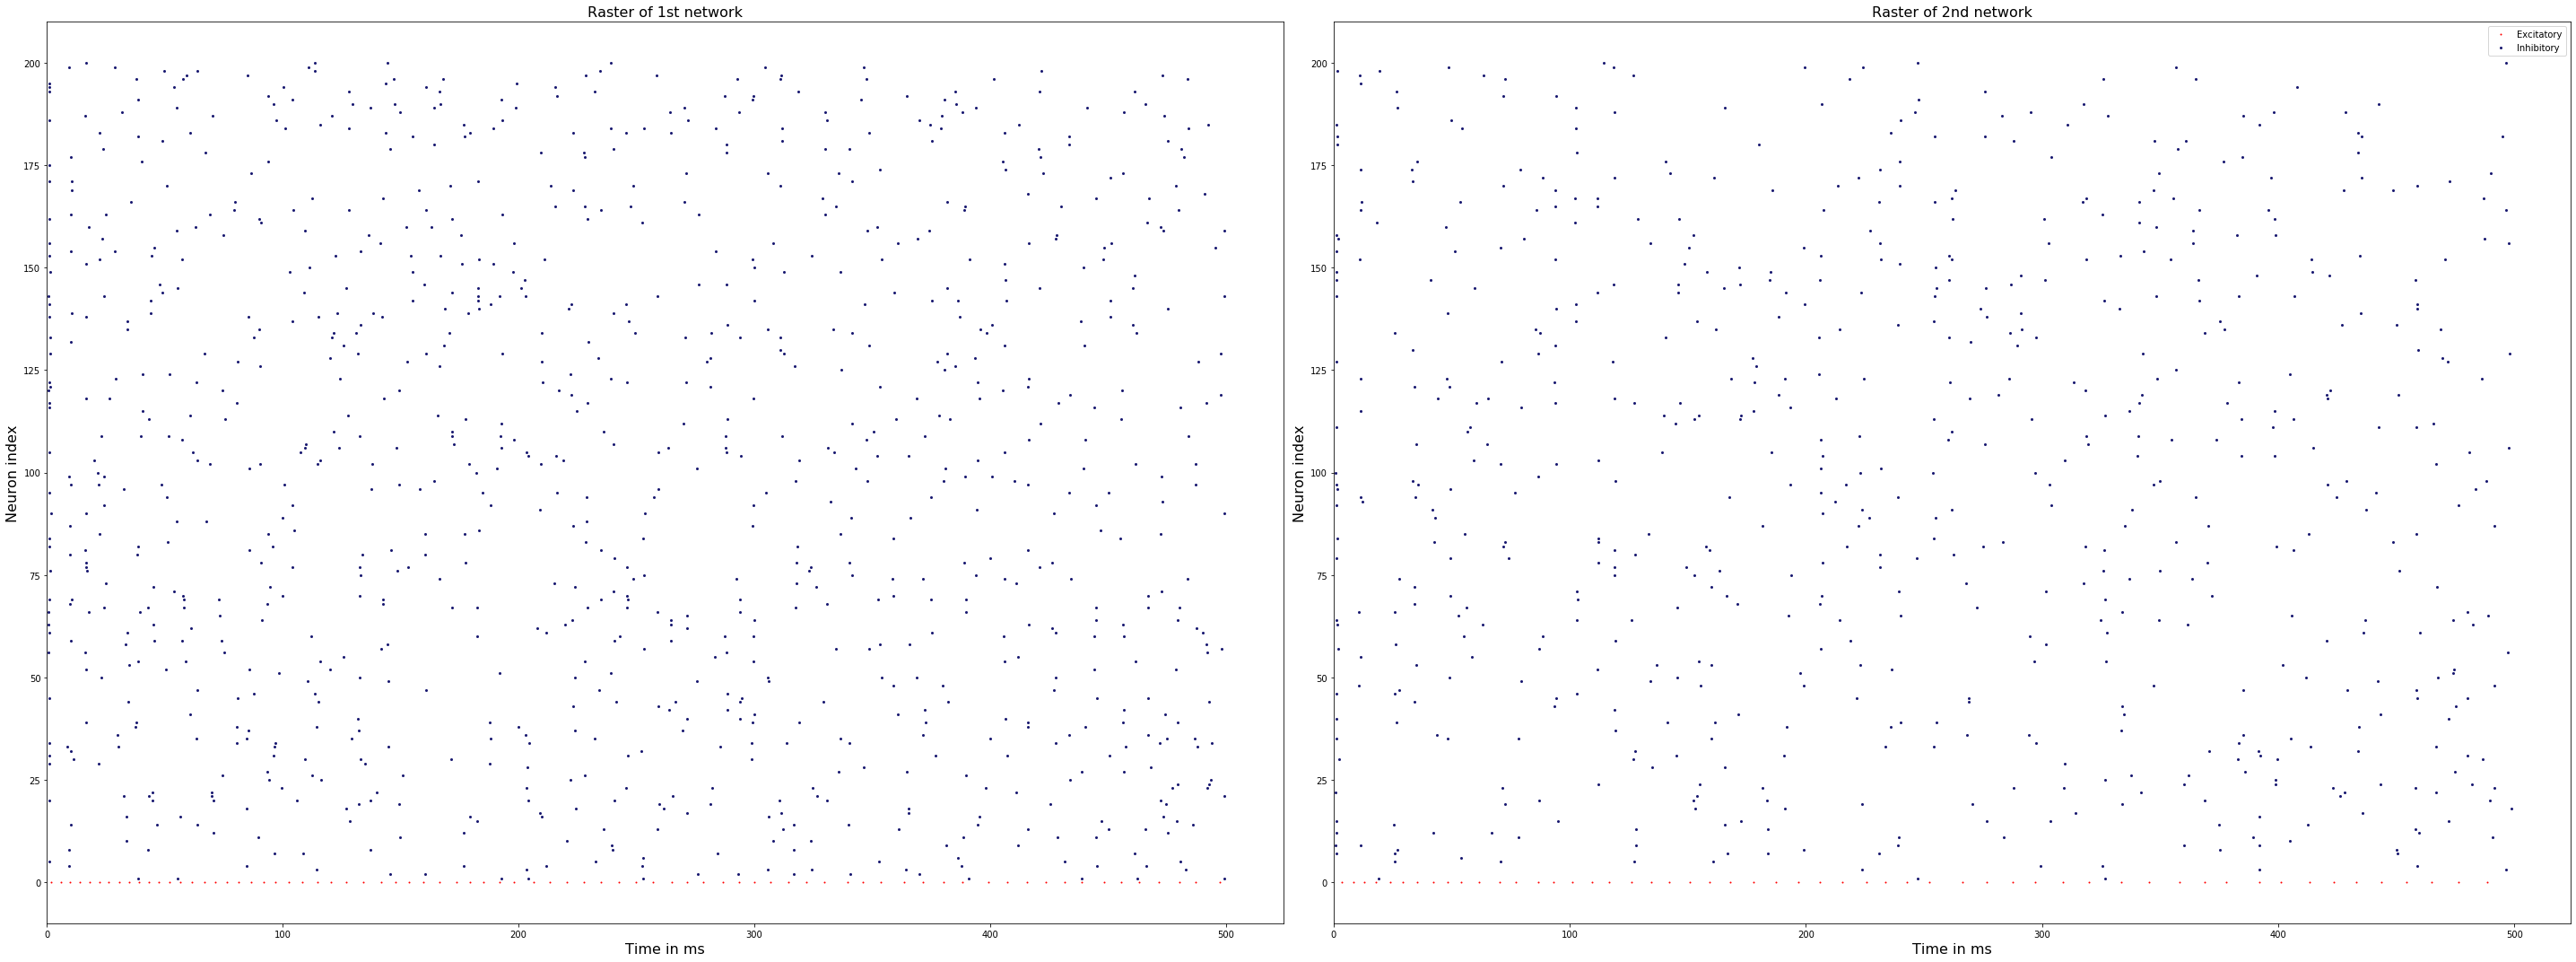

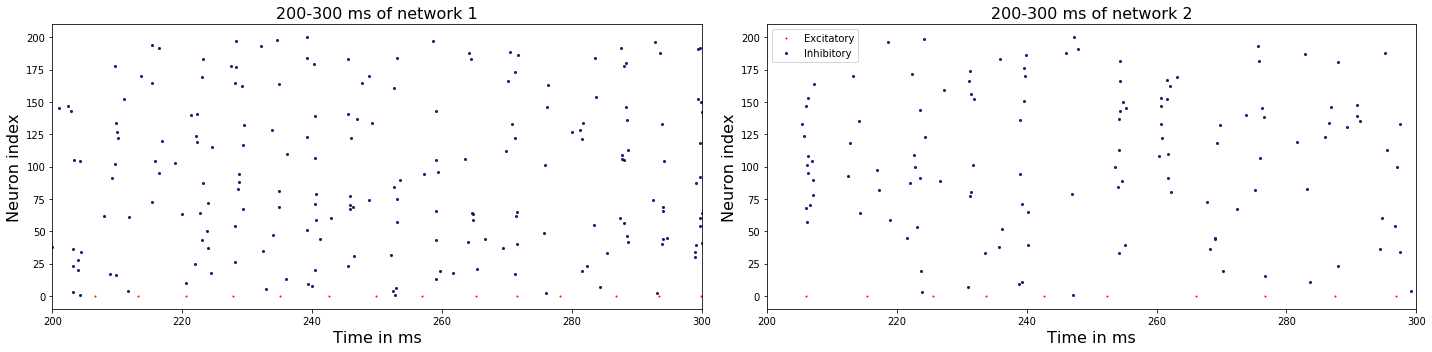

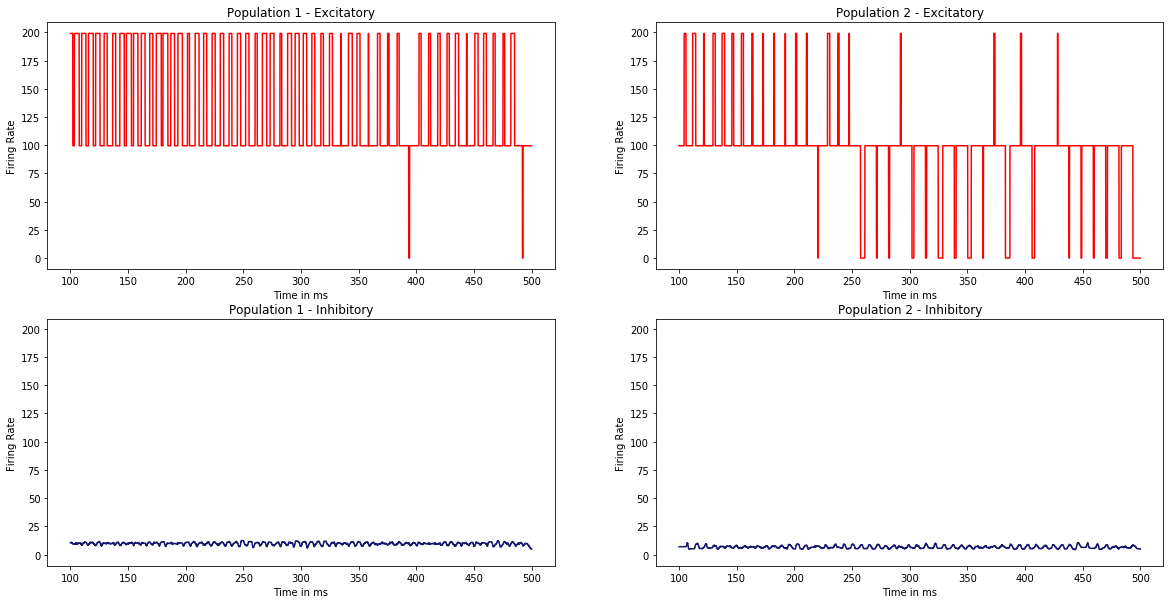

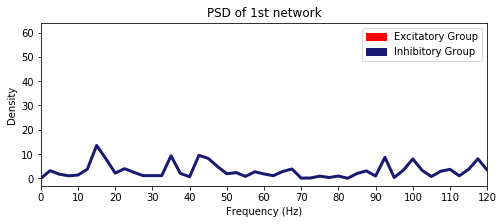

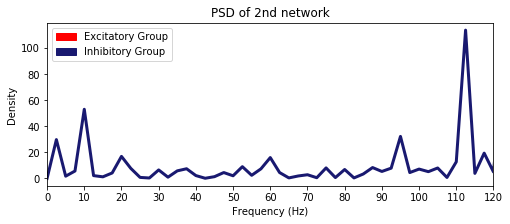

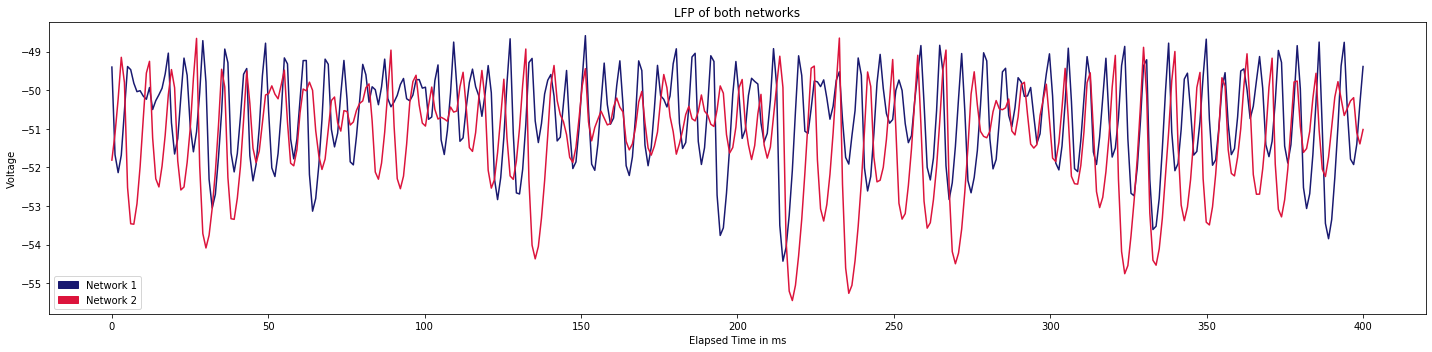

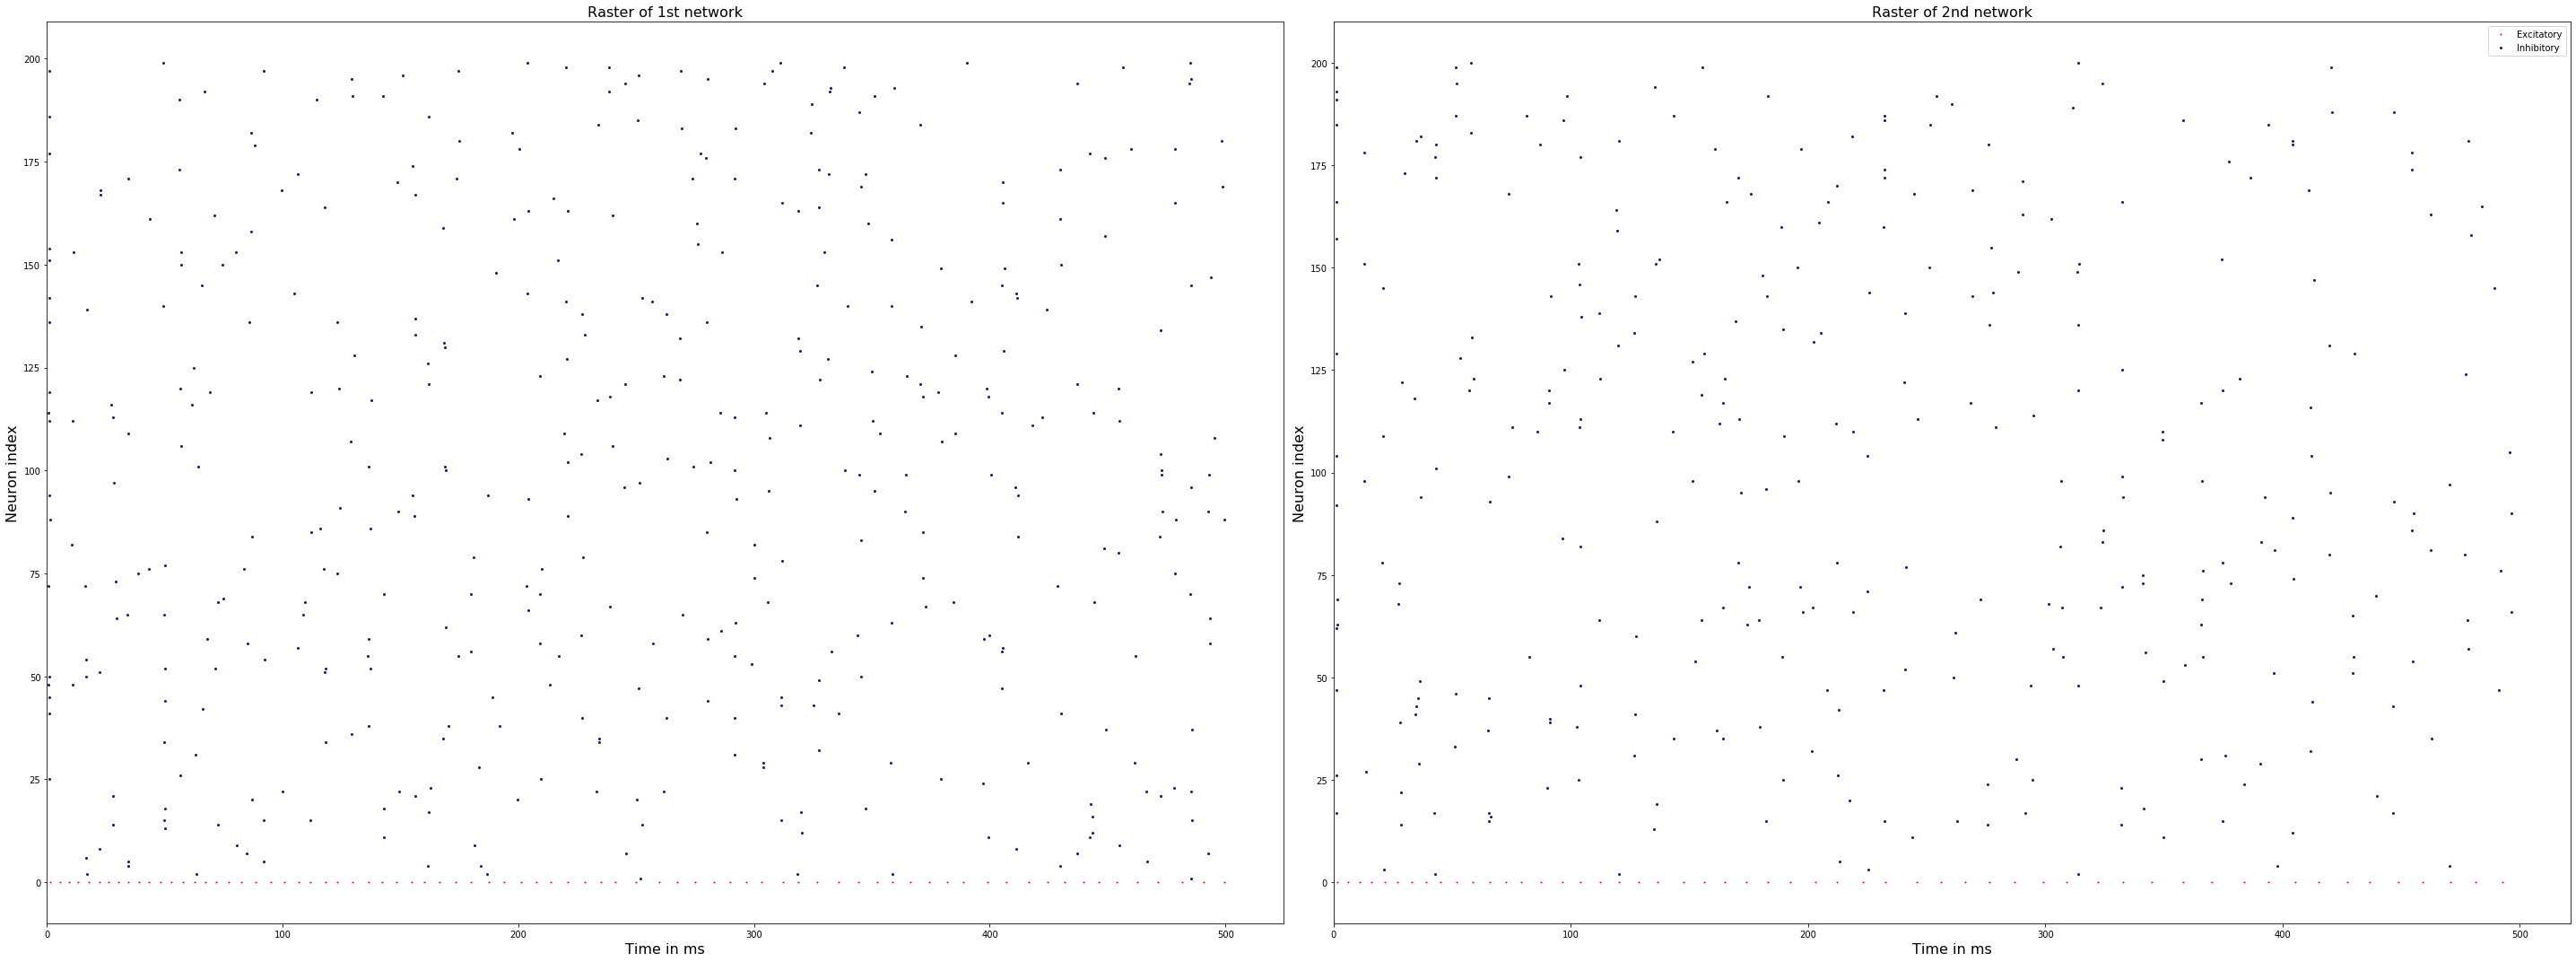

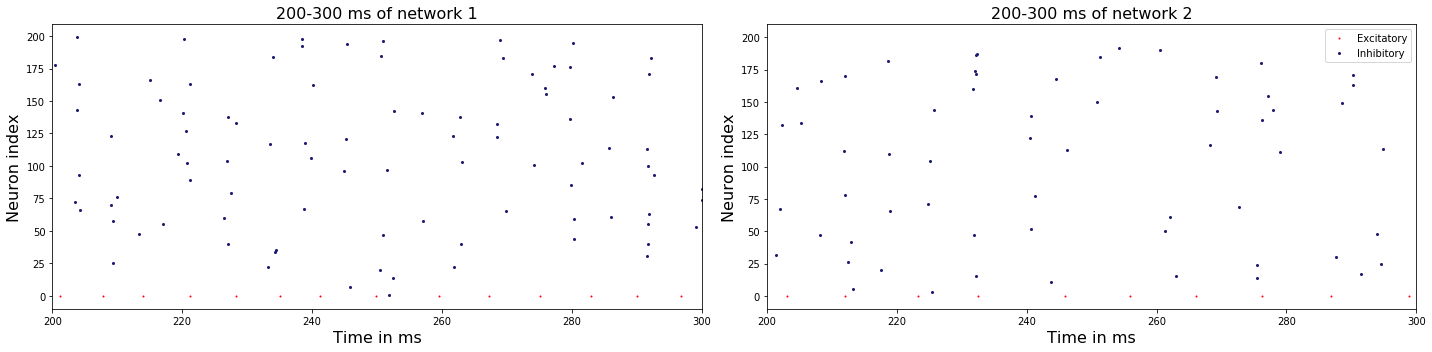

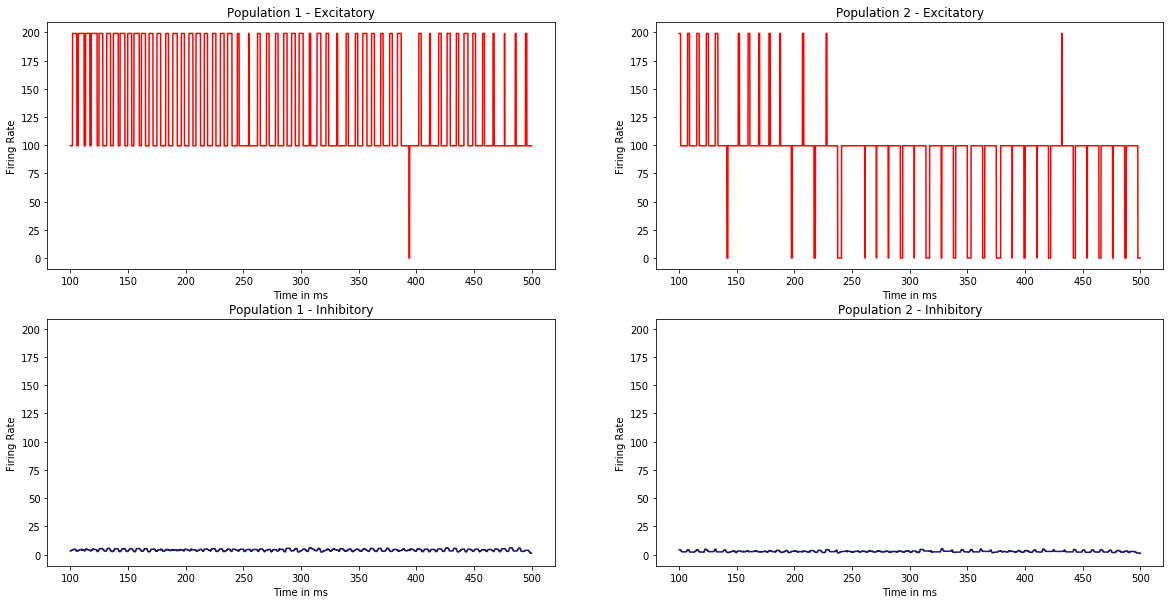

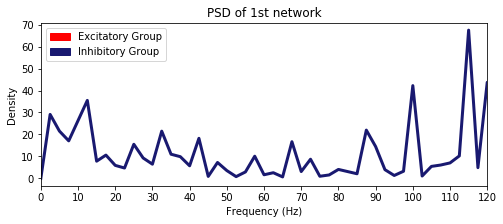

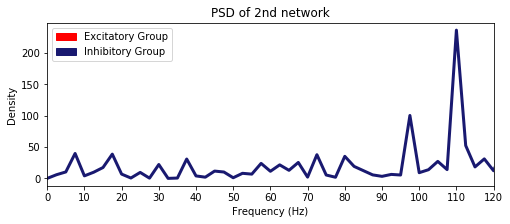

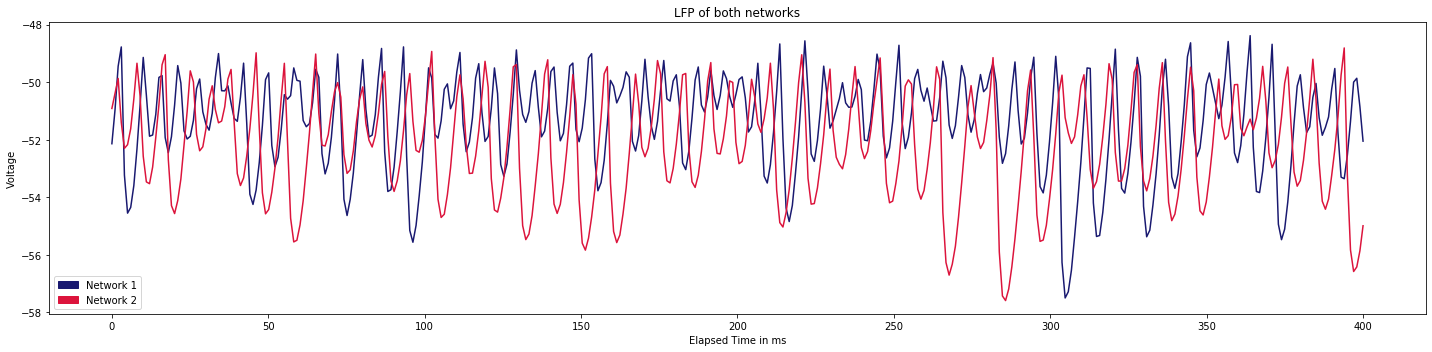

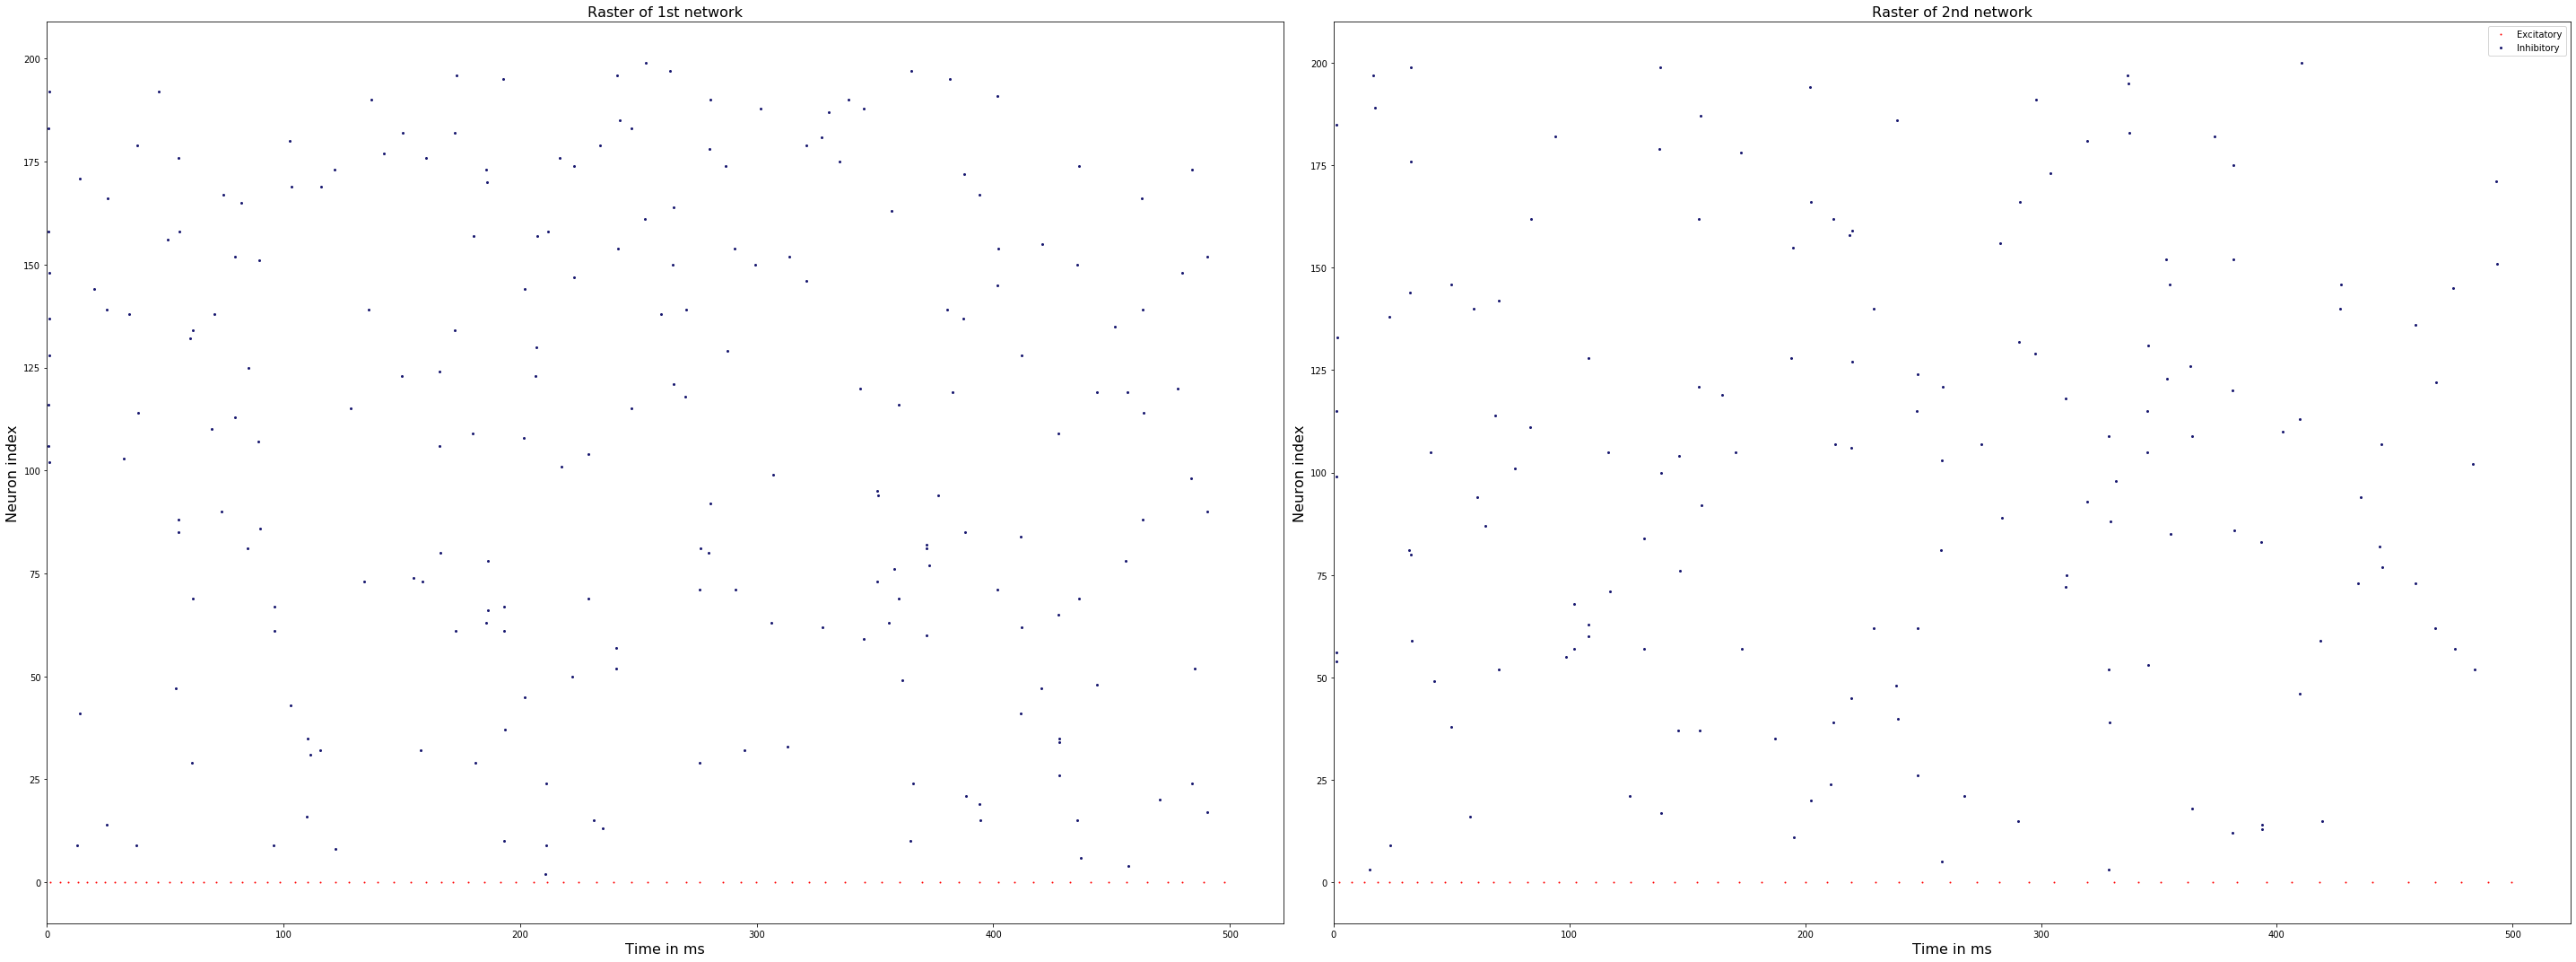

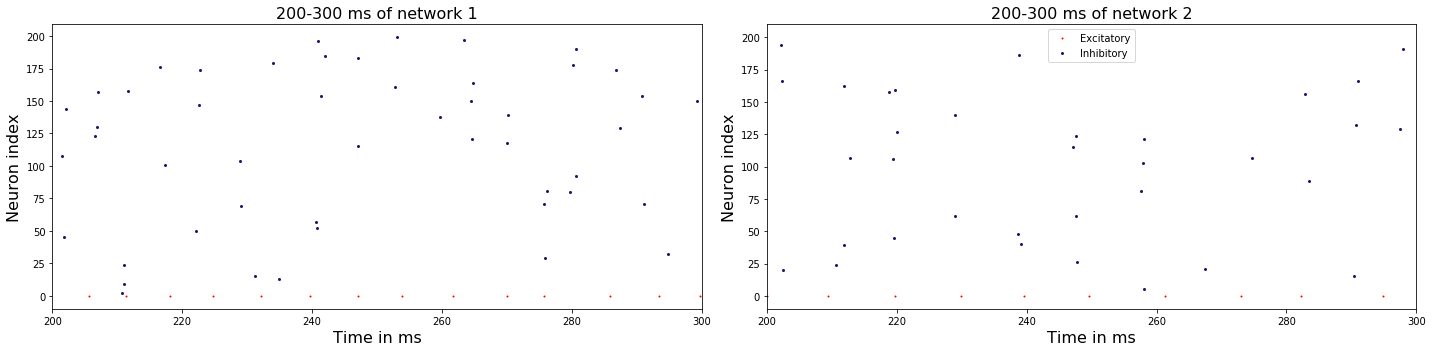

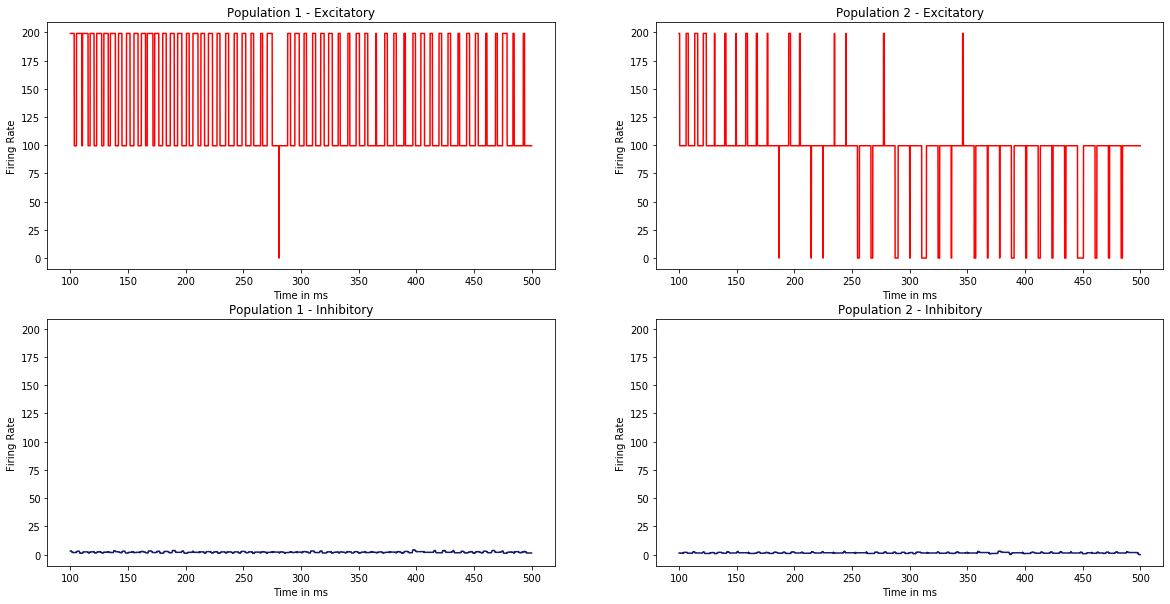

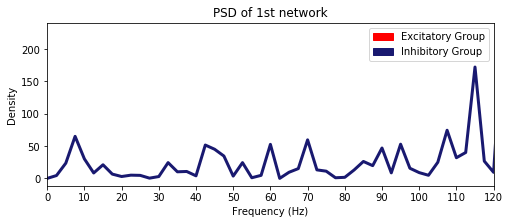

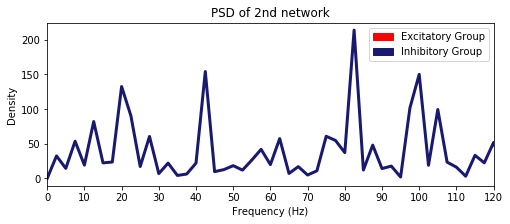

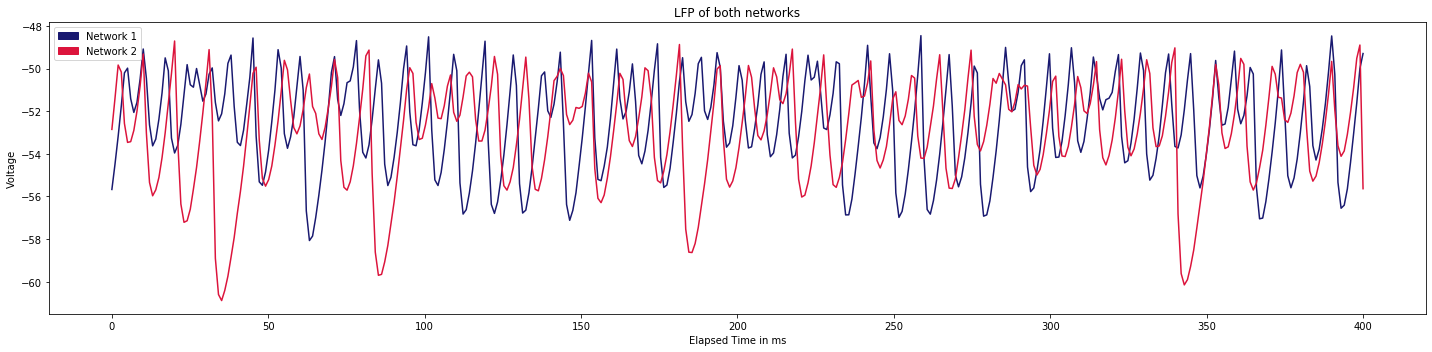

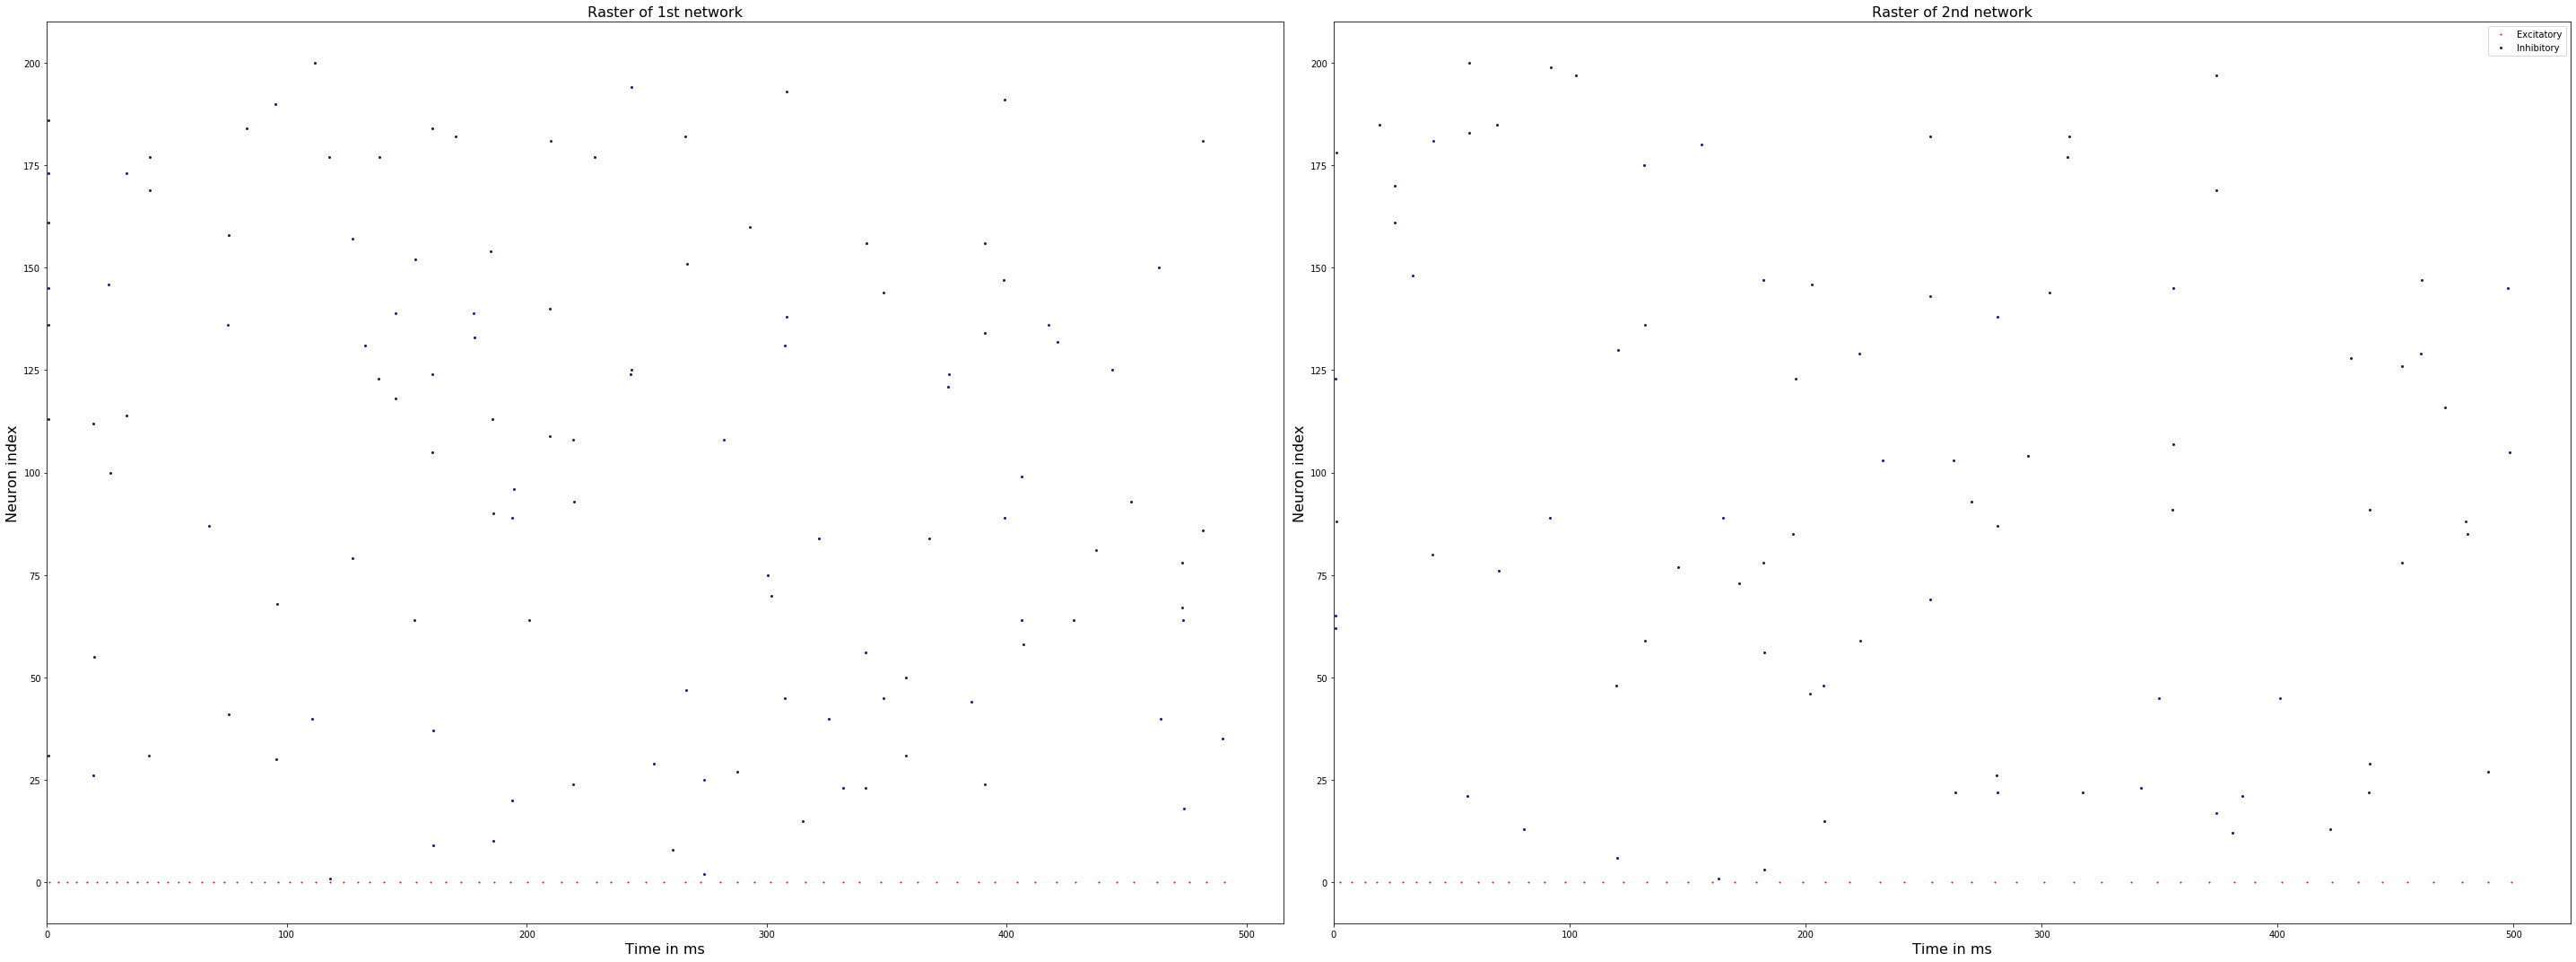

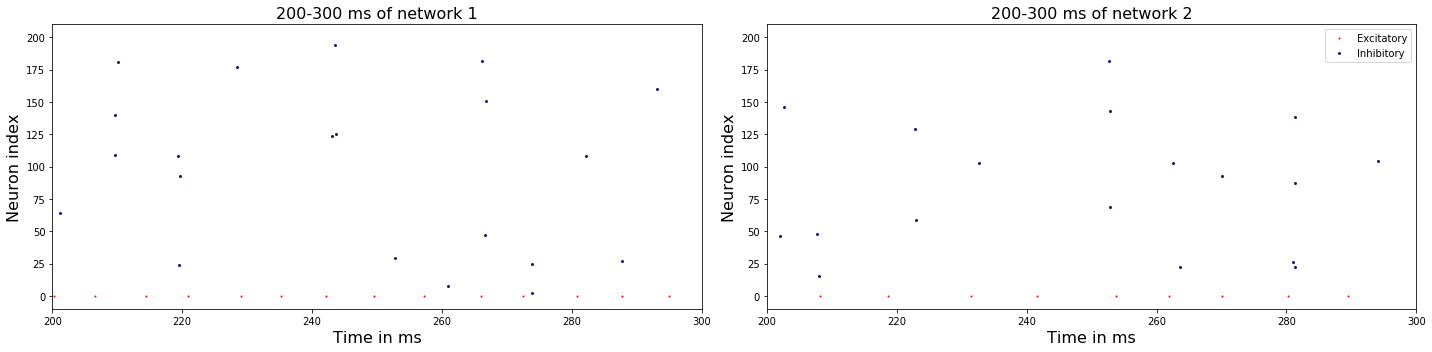

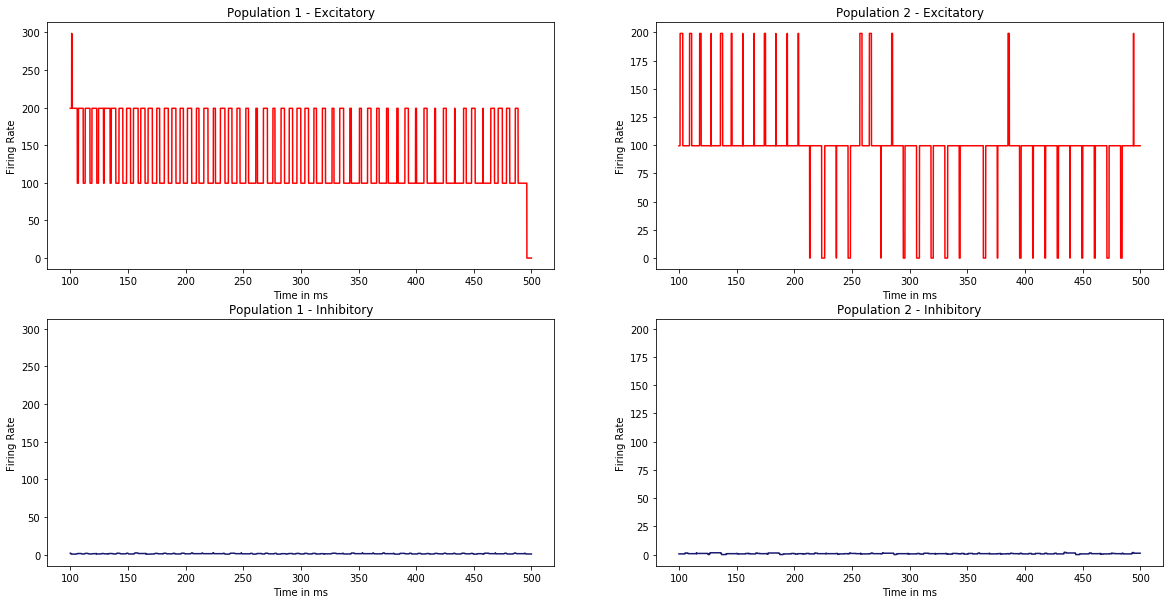

In [8]:
for m, v in zip(models, values):
    print(f"----- J_itoi: {v} ----- ")
    plots.plot_results(m, pop_rates=True, full_raster=True)
    plt.show()